In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# def makeLMfilters():
#     sup     = 49
#     scalex  = np.sqrt(2) * np.array([1,2,3])
#     norient = 6
#     nrotinv = 12

#     nbar  = len(scalex)*norient
#     nedge = len(scalex)*norient
#     nf    = nbar+nedge+nrotinv
#     F     = np.zeros([sup,sup,nf])
#     hsup  = (sup - 1)/2

#     x = [np.arange(-hsup,hsup+1)]
#     y = [np.arange(-hsup,hsup+1)]

#     [x,y] = np.meshgrid(x,y)

#     orgpts = [x.flatten(), y.flatten()]
#     orgpts = np.array(orgpts)
    
#     count = 0
#     for scale in range(len(scalex)):
#         for orient in range(norient):
#             angle = (np.pi * orient)/norient
#             c = np.cos(angle)
#             s = np.sin(angle)
#             rotpts = [[c+0,-s+0],[s+0,c+0]]
#             rotpts = np.array(rotpts)
#             rotpts = np.dot(rotpts,orgpts)
#             F[:,:,count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
#             F[:,:,count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
#             count = count + 1
            
#     count = nbar+nedge
#     scales = np.sqrt(2) * np.array([1,2,3,4])
    
#     for i in range(len(scales)):
#         F[:,:,count]   = gaussian2d(sup, scales[i])
#         count = count + 1
        
#     for i in range(len(scales)):
#         F[:,:,count] = log2d(sup, scales[i])
#         count = count + 1
        
#     for i in range(len(scales)):
#         F[:,:,count] = log2d(sup, 3*scales[i])
#         count = count + 1
        
#     return F


# F = makeLMfilters()
# print(F.shape) #same as print(np.shape(F))
# FB_responses = makeResponses(img, F)
# print(FB_responses.shape, img.shape)
# card2g = compute_l1_norm_responsesG(FB_responses)


In [2]:
# import cv2
# import os
# import numpy as np

# def compute_l1_norm_responsesG(responses):
#     w, h, ch, num_filters = responses.shape
#     l1_norm_responses = np.empty([num_filters + 1])

#     for i in range(num_filters):
#         response = responses[:, :, :, i]
#         l1_norm_response = np.sum(np.abs(response))
#         l1_norm_response /= (w * h * ch)
#         l1_norm_responses[i] = l1_norm_response

#     l1_norm_responses[num_filters] = np.sum(l1_norm_responses[:-1])
#     return l1_norm_responses

# def makeResponses(img):
#     # Example operation: Simple blurring with different kernel sizes
#     num_filters = 48
#     if len(img.shape) == 3:
#         w, h, ch = img.shape
#     else:
#         w, h = img.shape
#         ch = 1

#     responses = np.empty([w, h, ch, num_filters])
#     for i in range(num_filters):
#         kernel_size = (i % 5) + 1
#         filter_kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

#         if ch > 1:
#             for c in range(ch):
#                 responses[:, :, c, i] = cv2.filter2D(img[:, :, c], -1, filter_kernel)
#         else:
#             responses[:, :, :, i] = cv2.filter2D(img, -1, filter_kernel)

#     return responses

# def get_all_l1_responses(image_path):
#     all_l1_responses = []
#     image_files = [os.path.join(root, file) for root, _, files in os.walk(image_path) for file in files if file.endswith('.png')]
    
#     for file in image_files:
#         image = cv2.imread(file)
#         if image is not None:
#             FB_responses = makeResponses(image)
#             l1_response = compute_l1_norm_responsesG(FB_responses)
#             all_l1_responses.append(l1_response)
    
#     return all_l1_responses

# all_l1_responses = get_all_l1_responses("C:/Caleb/College/UIC/Senior_Year/CS 415/Project_2/clean_images")


In [28]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# for filename in os.listdir(directory_path):
#     if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
#         img_path = os.path.join(directory_path, filename)
#         img = mpimg.imread(img_path)
        
#         plt.imshow(img)
#         plt.axis('off')  # Turn off axis labels
#         plt.title(filename)  # Set image title as filename
#         plt.show()


In [12]:
import os
import cv2
import numpy as np

def compute_l1_norm(directory_path):
    images = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
    
    # Resize images to a consistent shape
    min_shape = min(image.shape for image in images)
    images_resized = [cv2.resize(image, min_shape[::-1]) for image in images]
    
    # Calculate L1 norm
    l1_norm = 0
    for i in range(len(images_resized) - 1):
        l1_norm += np.sum(np.abs(images_resized[i].astype(np.float32) - images_resized[i + 1].astype(np.float32)))
    
    return l1_norm


# Compute L1 norm
result = compute_l1_norm(directory_path)
print("L1 norm of the images:", result)


L1 norm of the images: 20347554992.0


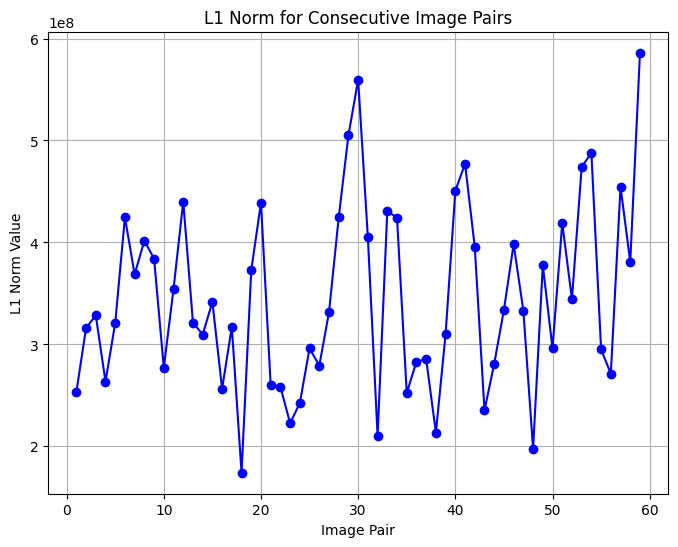

In [13]:
def compute_l1_norm_per_image(directory_path):
    images = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
    
    # Resize images to a consistent shape
    min_shape = min(image.shape for image in images)
    images_resized = [cv2.resize(image, min_shape[::-1]) for image in images]
    
    # Calculate L1 norm for each pair of consecutive images
    l1_norm_values = []
    for i in range(len(images_resized) - 1):
        l1_norm = np.sum(np.abs(images_resized[i].astype(np.float32) - images_resized[i + 1].astype(np.float32)))
        l1_norm_values.append(l1_norm)
    
    return l1_norm_values


# Compute L1 norm for each image pair
l1_norm_values = compute_l1_norm_per_image(directory_path)

# Plotting L1 norm values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(l1_norm_values) + 1), l1_norm_values, marker='o', linestyle='-', color='b')
plt.title('L1 Norm for Consecutive Image Pairs')
plt.xlabel('Image Pair')
plt.ylabel('L1 Norm Value')
plt.grid(True)
plt.show()

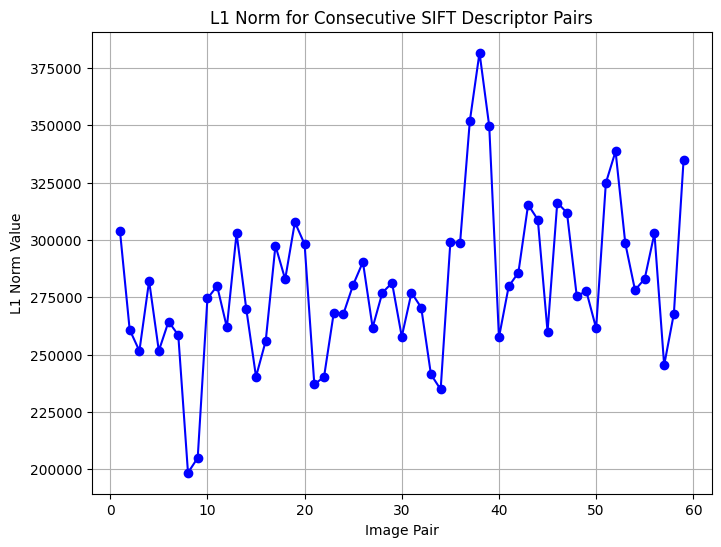

In [15]:
def compute_sift_l1_norm(directory_path, num_descriptors=100):
    sift = cv2.SIFT_create()
    images = []
    sift_descriptors = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
            kp, des = sift.detectAndCompute(img, None)
            # Normalize the number of descriptors
            if des is not None:
                des = des[:num_descriptors]
                sift_descriptors.append(des)
    
    # Calculate L1 norm for each pair of consecutive SIFT descriptors
    l1_norm_values = []
    for i in range(len(sift_descriptors) - 1):
        l1_norm = np.sum(np.abs(sift_descriptors[i].astype(np.float32) - sift_descriptors[i + 1].astype(np.float32)))
        l1_norm_values.append(l1_norm)
    
    return l1_norm_values

# Directory containing the images

# Compute L1 norm for SIFT descriptors of each image pair
sift_l1_norm_values = compute_sift_l1_norm(directory_path)

# Plotting L1 norm values of SIFT descriptors
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sift_l1_norm_values) + 1), sift_l1_norm_values, marker='o', linestyle='-', color='b')
plt.title('L1 Norm for Consecutive SIFT Descriptor Pairs')
plt.xlabel('Image Pair')
plt.ylabel('L1 Norm Value')
plt.grid(True)
plt.show()


In [17]:
pip install numpy scikit-learn opencv-python



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/69/8a/cf17d6443f5f537e099be81535a56ab68a473f9393fbffda38cd19899fc8/scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/f8/ec/b46756f80e3f4c5f0989f6e4492c2851f156d9c239d554754a3c8cffd4e2/scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------------- 60.4/60.4 kB 809.0 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://file

In [20]:
# import cv2
# import os

# def calculate_l1_norm(image1, image2):
#     return cv2.norm(image1, image2, cv2.NORM_L1)

# def is_tb_image(image_path):
#     tb_image_path = image_path
#     tb_image = cv2.imread(tb_image_path)
#     current_image = cv2.imread(image_path)
#     l1_distance = calculate_l1_norm(tb_image, current_image)
    
#     # Set a threshold for L1 distance to determine if it's a TB image or not
#     threshold = 10000  # You may need to adjust this based on your dataset
    
#     if l1_distance < threshold:
#         return True  # TB image
#     else:
#         return False  # Not a TB image


# for filename in os.listdir(directory_path):
#     if filename.endswith(".png"):
#         image_path = os.path.join(directory_path, filename)
#         is_tb = is_tb_image(image_path)
#         print(f"{filename} is TB: {is_tb}")

CHNCXR_0001_0.png is TB: True
CHNCXR_0002_0.png is TB: True
CHNCXR_0003_0.png is TB: True
CHNCXR_0004_0.png is TB: True
CHNCXR_0005_0.png is TB: True
CHNCXR_0006_0.png is TB: True
CHNCXR_0007_0.png is TB: True
CHNCXR_0008_0.png is TB: True
CHNCXR_0009_0.png is TB: True
CHNCXR_0010_0.png is TB: True
CHNCXR_0011_0.png is TB: True
CHNCXR_0012_0.png is TB: True
CHNCXR_0013_0.png is TB: True
CHNCXR_0014_0.png is TB: True
CHNCXR_0015_0.png is TB: True
CHNCXR_0016_0.png is TB: True
CHNCXR_0017_0.png is TB: True
CHNCXR_0018_0.png is TB: True
CHNCXR_0019_0.png is TB: True
CHNCXR_0020_0.png is TB: True
CHNCXR_0021_0.png is TB: True
CHNCXR_0022_0.png is TB: True
CHNCXR_0023_0.png is TB: True
CHNCXR_0024_0.png is TB: True
CHNCXR_0025_0.png is TB: True
CHNCXR_0026_0.png is TB: True
CHNCXR_0027_0.png is TB: True
CHNCXR_0028_0.png is TB: True
CHNCXR_0029_0.png is TB: True
CHNCXR_0030_0.png is TB: True
CHNCXR_0031_0.png is TB: True
CHNCXR_0032_0.png is TB: True
CHNCXR_0033_0.png is TB: True
CHNCXR_003

In [11]:
import cv2
import os
import numpy as np
directory_path = "clean_images"
output_file = "output_results.txt"



def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def classify_images(directory_path, threshold=110):
    # tb_image_path = directory_path
    # print(directory_path)
    # tb_image = cv2.imread(tb_image_path)
    # tb_image = cv2.cvtColor(tb_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    label0 = 0
    label1 = 0
    l1_vals = []

    with open(output_file, 'w') as file:
        for filename in os.listdir(directory_path):
            if filename.endswith(".png"):
                image_path = os.path.join(directory_path, filename)
                current_image = cv2.imread(image_path)
                current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
                
                l1_distance = calculate_l1_norm(current_image)
                
                label = int(filename[-5])
                if label:
                    label1 += 1
                else:
                    label0 += 1

                if l1_distance < threshold:
                    predicted_label = 1
                else:
                    predicted_label = 0
                    
                file.write(f"Image: {filename}, Actual Label: {label}, Predicted Label: {predicted_label}\n")
                
                if predicted_label == label:
                    file.write("Correctly classified\n")
                else:
                    file.write("Misclassified\n")
                    
                file.write(f"L1 Norm: {l1_distance}\n")
                file.write("-------------------\n")
                
                l1_vals.append(l1_distance)
    return l1_vals

l1_vals = classify_images(directory_path)


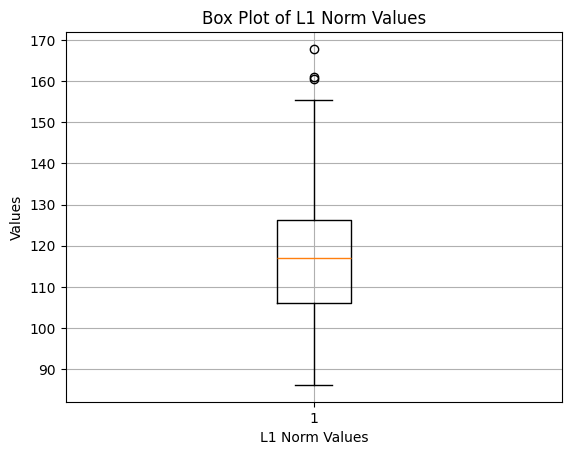

In [12]:
import matplotlib.pyplot as plt

# Assuming l1_vals is already populated with values from the classify_images function

plt.boxplot(l1_vals)
plt.xlabel('L1 Norm Values')
plt.ylabel('Values')
plt.title('Box Plot of L1 Norm Values')
plt.grid(True)
plt.show()


In [13]:
import cv2
import os
import numpy as np

directory_path = "clean_images"
output_file = "output_results_sift.txt"


def calculate_sift(image):
    # Initialize SIFT detector
    sift = cv2.SIFT_create()
    # Detect keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors


def calculate_sift_l1_norm(image):
    keypoints, descriptors = calculate_sift(image)
    # Compute L1 norm of SIFT descriptors
    l1_norm_response = np.sum(np.abs(descriptors))
    l1_norm_response /= descriptors.size if descriptors.size > 0 else 1
    return l1_norm_response


def classify_images(directory_path, threshold=19):
    label0 = 0
    label1 = 0
    l1_vals = []

    with open(output_file, 'w') as file:
        for filename in os.listdir(directory_path):
            if filename.endswith(".png"):
                image_path = os.path.join(directory_path, filename)
                current_image = cv2.imread(image_path)
                current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)

                l1_distance = calculate_l1_norm(current_image)

                sift_l1_distance = calculate_sift_l1_norm(current_image)

                label = int(filename[-5])
                if label:
                    label1 += 1
                else:
                    label0 += 1

                if sift_l1_distance < threshold:
                    predicted_label = 1
                else:
                    predicted_label = 0

                file.write(f"Image: {filename}, Actual Label: {label}, Predicted Label: {predicted_label}\n")

                if predicted_label == label:
                    file.write("Correctly classified\n")
                else:
                    file.write("Misclassified\n")

                file.write(f"L1 Norm (Pixel): {l1_distance}\n")
                file.write(f"L1 Norm (SIFT): {sift_l1_distance}\n")
                file.write("-------------------\n")

                l1_vals.append(sift_l1_distance)
    return l1_vals


l1_vals = classify_images(directory_path)


KeyboardInterrupt: 

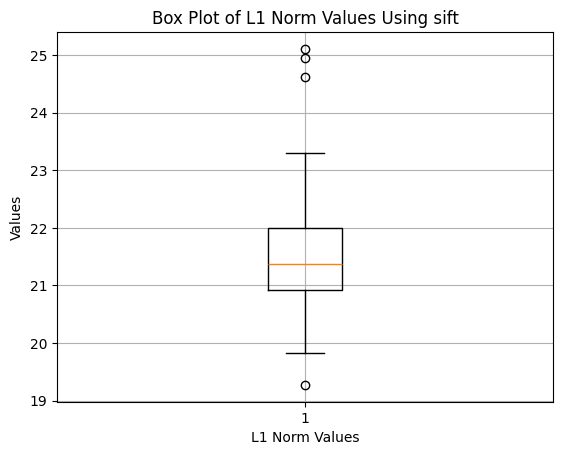

threshold of 19
Because the sift value for tb is in the thick of the non tb sift values, sift is not a good way to classify TB/ non TB


In [8]:
import matplotlib.pyplot as plt

# Assuming l1_vals is already populated with values from the classify_images function

plt.boxplot(l1_vals)
plt.xlabel('L1 Norm Values')
plt.ylabel('Values')
plt.title('Box Plot of L1 Norm Values Using sift')
plt.grid(True)
plt.show()
print("threshold of 19")
print("Because the sift value for tb is in the thick of the non tb sift values, sift is not a good way to classify TB/ non TB")

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Function to compute L1 norm for an image
def compute_l1_norm(image):
    return np.linalg.norm(image.flatten(), ord=1)

# Path to your folder containing images
folder_path = 'clean_images/'

# Initialize lists to store features and labels
features = []
labels = []

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter for image files
        # Read the image using OpenCV
        image = cv2.imread(os.path.join(folder_path, filename))

        # Preprocess the image if needed (resizing, normalization, etc.)
        # ... (add your preprocessing steps here)

        # Compute L1 norm for the image
        l1_norm = compute_l1_norm(image)

        # Extract label based on filename (assuming TB images end in '_1' and non-TB in '_0')
        if filename.endswith('_1.jpg') or filename.endswith('_1.png'):
            label = 1  # TB label
        elif filename.endswith('_0.jpg') or filename.endswith('_0.png'):
            label = 0  # Non-TB label
        else:
            label = -1  # Unknown label or other conditions
        
        # Append computed features and label to lists
        features.append(l1_norm)
        labels.append(label)

# Convert lists to numpy arrays for machine learning
features = np.array(features).reshape(-1, 1)  # Reshape to a 2D array for scikit-learn
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, predictions))


CHNCXR_0001_0.png
CHNCXR_0002_0.png
CHNCXR_0003_0.png
CHNCXR_0004_0.png
CHNCXR_0005_0.png
CHNCXR_0006_0.png
CHNCXR_0007_0.png
CHNCXR_0008_0.png
CHNCXR_0009_0.png
CHNCXR_0010_0.png
CHNCXR_0011_0.png
CHNCXR_0012_0.png
CHNCXR_0013_0.png
CHNCXR_0014_0.png
CHNCXR_0015_0.png


KeyboardInterrupt: 